C:\Users\XP\AppData\Local\Temp\ipykernel_8596\3251051485.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


Masukkan kondisi awal :
Masukkan titik yang dihitung : 
Masukkan jumlah step :


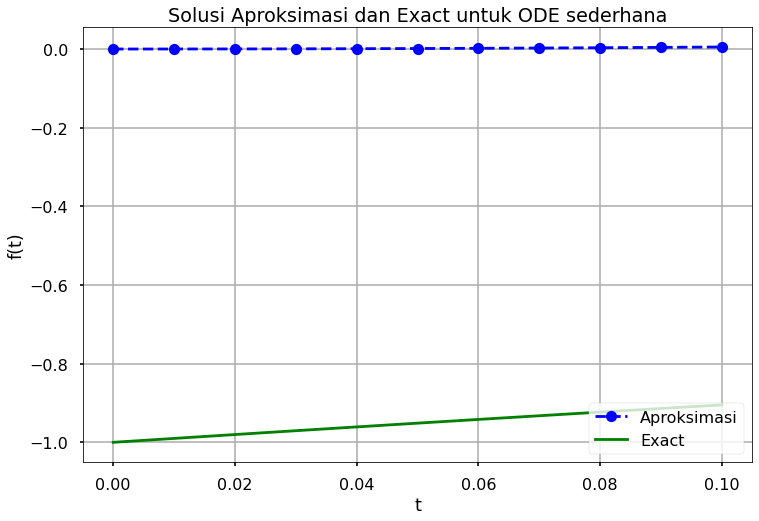

Nilai Heun = 0.005169089885009498
Nilai Exact = 0.005170918075647624
Galat relatif absolut =  0.03535524275148571 %


In [2]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')
%matplotlib inline

# Definisi parameter
f = lambda t, s: t + s # ODE

# Metode Heun
def heun(f,x0,y0,xn,n):
    h = (xn-x0)/n # ukuran langkah
    t = np.arange(x0,xn+h,h) # grid Numerik
    s0 = y0 # kondisi awal
    
    # Metode heun
    s = np.zeros(len(t))
    s[0] = s0
    
    for i in range(0, len(t) - 1):
        k1 = h*f(t[i], s[i])
        k2 = h*f(t[i]+h, s[i]+k1)
        s[i + 1] = s[i] + 0.5*(k1+k2)
        t[i+1] = t[i]+h
    return t, s

print('Masukkan kondisi awal :')
x0 = float(input('x0 = '))
y0 = float(input('y0 = '))

print('Masukkan titik yang dihitung : ')
xn = float(input('xn = '))

print('Masukkan jumlah step :')
n = int(input('Jumlah step = '))

t,s = heun(f,x0,y0,xn,n)

plt.figure(figsize = (12, 8))
plt.plot(t, s, 'bo--', label='Aproksimasi')
plt.plot(t, -np.exp(-t), 'g', label='Exact')
plt.title('Solusi Aproksimasi dan Exact untuk ODE sederhana')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()
sol_heun = s[-1]
sol_exact = (2.718281828459045**(0.1))-(0.1)-1 
galat_ra = abs((sol_exact-sol_heun)/sol_exact)*100
print('Nilai Heun =',sol_heun)
print('Nilai Exact =',sol_exact)
print('Galat relatif absolut = ',galat_ra,'%')